[View in Colaboratory](https://colab.research.google.com/github/kohei-shima/shima/blob/master/fmgw.ipynb)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import glob
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 5
epochs = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'fmgw.h5'

In [0]:
x = []
y = []

list = ["dakon","hagare","kinzoku","senni","senniPI","suji","tanjunhappou","ware","yakekasu"]

for j in range(len(list)):
    
    figure = glob.glob("../roi/"+list[j]+"/*")
    print(len(figure))
    
    for i range(len(figure)):
        fname = figure[i]
        img = img_to_array(load_img(fname,target_size=(50,50)))
                       
        x.append(img)
        y.append(j)
                       
x = np.asarray(x)
y = np.asarray(y)

0
0
0
0
0
0
0
0
0


In [0]:
(x_train,x_test),(y_train,y_test) = train_test_split(x,y,test_size=0.33,random_state=111)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


170500096/170498071 [==============================] - 12s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same',
#                 input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(64, (3, 3)))  ##kshima
model.add(Activation('relu'))

#model.add(Conv2D(32, (3, 3))) ##kshima
#model.add(Activation('relu')) ##kshima

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(1024, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

#opt = keras.optimizers.rmsprop(lr=0.001, decay=0.0) ##kshima
#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9,beta_2=0.999,decay=0.0) ##kshima
opt = keras.optimizers.Adamax(lr=0.002, beta_1=0.9,beta_2=0.999,decay=0.0) ##kshima
#opt = keras.optimizers.Nadam(lr=0.002, beta_1=0.9,beta_2=0.999,schedule_decay=0.004) ##kshima
#opt = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False) ##kshima
#opt = keras.optimizers.Adagrad(lr=0.01,decay=0.0) ##kshima
#opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0) ##kshima

In [0]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        fill_mode='nearest',  # set mode for filling points outside the input boundaries
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale=None,  # set rescaling factor (applied before any other transformation)
        preprocessing_function=None,  # set function that will be applied on each input
        data_format=None,  # image data format, either "channels_first" or "channels_last" 
        validation_split=0.0)  # fraction of images reserved for validation (strictly between 0 and 1)  
        
  # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
        
  # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

    


Using real-time data augmentation.
Epoch 1/10
 950/1563 [=================>............] - ETA: 33s - loss: 1.8252 - acc: 0.3129

1563/1563 [==============================] - 86s 55ms/step - loss: 1.6776 - acc: 0.3747 - val_loss: 1.2690 - val_acc: 0.5441
Epoch 2/10


1563/1563 [==============================] - 83s 53ms/step - loss: 1.1947 - acc: 0.5751 - val_loss: 1.0089 - val_acc: 0.6430
Epoch 3/10
  80/1563 [>.............................] - ETA: 1:15 - loss: 1.0491 - acc: 0.6418

1563/1563 [==============================] - 83s 53ms/step - loss: 0.9662 - acc: 0.6633 - val_loss: 0.8951 - val_acc: 0.6928


Epoch 4/10
1366/1563 [=========================>....] - ETA: 10s - loss: 0.8233 - acc: 0.7152

1563/1563 [==============================] - 83s 53ms/step - loss: 0.8205 - acc: 0.7163 - val_loss: 0.7469 - val_acc: 0.7481
Epoch 5/10
 476/1563 [========>.....................] - ETA: 55s - loss: 0.7355 - acc: 0.7465

1563/1563 [==============================] - 83s 53ms/step - loss: 0.7245 - acc: 0.7514 - val_loss: 0.5976 - val_acc: 0.7947
Epoch 6/10
 156/1563 [=>............................] - ETA: 1:11 - loss: 0.6975 - acc: 0.7568

1563/1563 [==============================] - 83s 53ms/step - loss: 0.6631 - acc: 0.7714 - val_loss: 0.6101 - val_acc: 0.7967
Epoch 7/10
  39/1563 [..............................] - ETA: 1:17 - loss: 0.6215 - acc: 0.7869

1563/1563 [==============================] - 82s 53ms/step - loss: 0.6103 - acc: 0.7933 - val_loss: 0.5491 - val_acc: 0.8183
Epoch 8/10
   3/1563 [..............................] - ETA: 1:20 - loss: 0.4793 - acc: 0.8021

1561/1563 [============================>.] - ETA: 0s - loss: 0.5693 - acc: 0.8073

1563/1563 [==============================] - 82s 53ms/step - loss: 0.5692 - acc: 0.8074 - val_loss: 0.5602 - val_acc: 0.8148
Epoch 9/10
 563/1563 [=========>....................] - ETA: 50s - loss: 0.5271 - acc: 0.8214

1563/1563 [==============================] - 83s 53ms/step - loss: 0.5373 - acc: 0.8185 - val_loss: 0.5240 - val_acc: 0.8263
Epoch 10/10
 198/1563 [==>...........................] - ETA: 1:08 - loss: 0.5078 - acc: 0.8273

1563/1563 [==============================] - 83s 53ms/step - loss: 0.5060 - acc: 0.8280 - val_loss: 0.5030 - val_acc: 0.8336


In [0]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


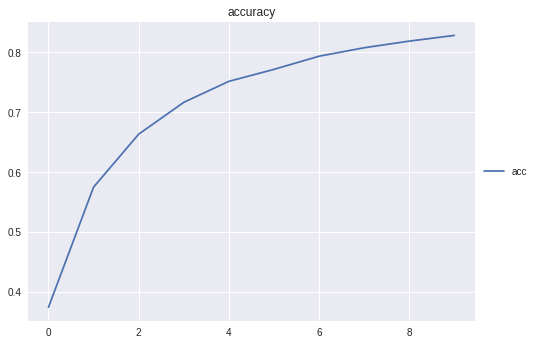

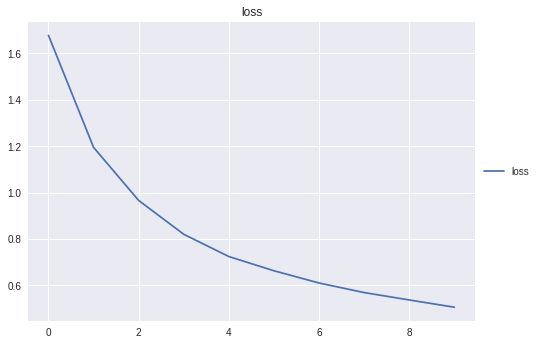

In [0]:
    import matplotlib.pyplot as plt

    x = range(epochs)
    plt.plot(x, history.history['acc'], label="acc")
    plt.title("accuracy")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    plt.plot(x, history.history['loss'], label="loss")
    plt.title("loss")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [0]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


10000/10000 [==============================] - 4s 364us/step
Test loss: 0.5029792829990387
Test accuracy: 0.8336
